# Validate The Model
**The code below imports the necessary libraries for this project.**

In [1]:
from fastai.imports import *
from fastai.vision.all import *
from fastai.vision.widgets import *
from PIL import Image
import numpy

**The path to the validation dataset**

In [2]:
PATH = "/kaggle/input/testset/data/validation"

**The batch sice**

In [3]:
bs = 128

**A test to se if you get a image from the validation dataset**

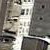

In [4]:
im = Image.open(PATH+"/no_pools/img957.jpg")
im

**A datablock like we have in the CreateModel but here its much more simple. See [createmodel.ipynb](https://www.kaggle.com/code/jrgenbjerkan/createmodel) for mor information**

In [5]:
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(50))


**By creating a DataLoaders object with the specified batch size, the model can efficiently process the data during validation.**

In [6]:
dls = data.dataloaders(PATH, bs=bs)

**loads a pre-trained model into the learn variable using the load_learner function from the fastai library. The cpu=False argument specifies that the model should be loaded onto a GPU if one is available. This can significantly speed up the prediction process, especially for large models and datasets.**

In [7]:
learn= load_learner('/kaggle/input/pool-detection-model/Pool-Detection-Model.pkl', cpu=False)

**create a new Learner object named new_learn using the dls object and the model attribute of the learn object as inputs. The loss_func argument specifies the loss function to use during training, and the metrics argument specifies the metric(s) to use for evaluating the model.**

In [8]:
new_learn = Learner(dls, learn.model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
new_learn.model.load_state_dict(learn.model.state_dict())


<All keys matched successfully>

**This line of code calculates the validation loss and accuracy of the new_learn model and assigns the values to the val_loss and val_acc variables.**

In [9]:
val_loss, val_acc = new_learn.validate()

**The output of this line of code will display the validation loss and accuracy of the model**

In [10]:
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_acc}')

Validation Loss: 0.4650639295578003, Validation Accuracy: 0.8450704216957092


The Validation Loss value of 0.465 indicates the average loss (error) of the model on the validation set. A lower validation loss indicates that the model is performing better on the validation set, as it is making more accurate predictions.

The Validation Accuracy value of 0.845 indicates the percentage of correctly predicted labels in the validation set by the model. A higher validation accuracy indicates that the model is performing better on the validation set, as it is making more accurate predictions.